# Домашнее задание No2. Градиентный спуск

In [1]:
import numpy as np
import pandas as pd

import methods
import oracles
import matplotlib.pyplot as plt

from collections import defaultdict
from plot_trajectory_2d import plot_levels, plot_trajectory

In [2]:
plt.rcParams["figure.figsize"] = (16, 8)

# Траектория градиентного спуска на квадратичной функции

Задайте две-три двумерные квадратичные функции с разными числами обусловленности. Запустите на них GD с различными стратегиями выбора шага, изобразите на графиках траектории методов и линии уровня функции. Для рисования линий уровня воспользуйтесь функцией `plot_trajectory`, а для траекторий методов – функцией `plot_levels` из файла
`plot_trajectory_2d`.

Для начала воспользуемся указаниями из пункта 1.4 описания ДЗ по генерации случайной функции.

In [ ]:
orth = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

In [ ]:
S = orth(1.5)

Для анализа траектории создадим 3 функции с $k = 5, 10, 100$:

In [5]:
matrices_dict = {}
for k in [5, 10, 100]:
    A = np.diag([1, k])
    matrix = S.dot(A).dot(S.T)
    print(f"Matrix with conditional number {k} is:")
    print(matrix)
    matrices_dict[k] = matrix

Matrix with conditional number 5 is:
[[4.97998499 0.28224002]
 [0.28224002 1.02001501]]
Matrix with conditional number 10 is:
[[9.95496623 0.63504004]
 [0.63504004 1.04503377]]
Matrix with conditional number 100 is:
[[99.50462858  6.9854404 ]
 [ 6.9854404   1.49537142]]


**Постарайтесь ответить на вопрос:** как зависит поведение методов от числа обусловленности, от начальной точки, от стратегии выбора длины шага?

Чтобы ответить на эти вопросы, для каждого числа обусловленности будем генерировать 20 случайных стартовых точек, и затем запускать градиентный спуск с тремя стратегиями выбора шага, занося полученные данные в таблицу, чтобы потом было удобнее сравнивать. Также, будем для примера отрисовывать траекторию каждого метода для каждой последней точки.

In [6]:
ful_res_dict = defaultdict(dict)

### k = 5

In [14]:
k = 5
small_res_dict = defaultdict(dict)
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

Number of iterations: 501


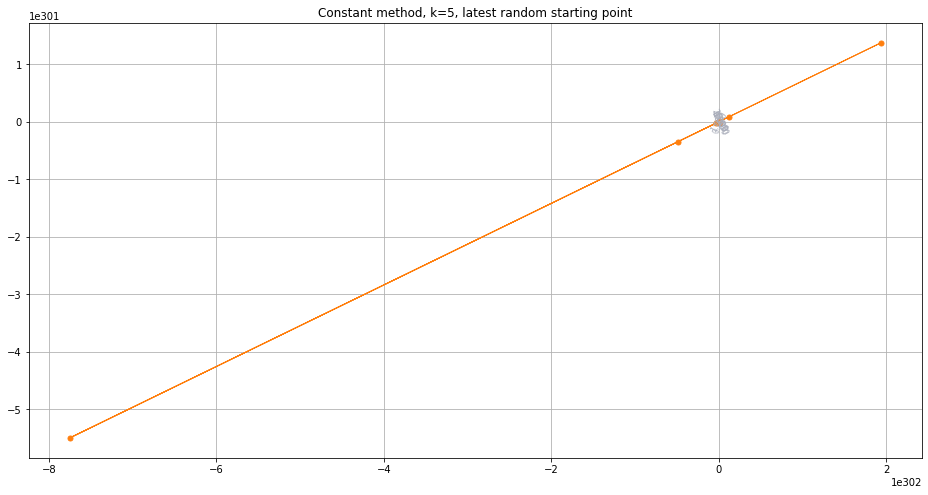

In [15]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

Number of iterations: 23


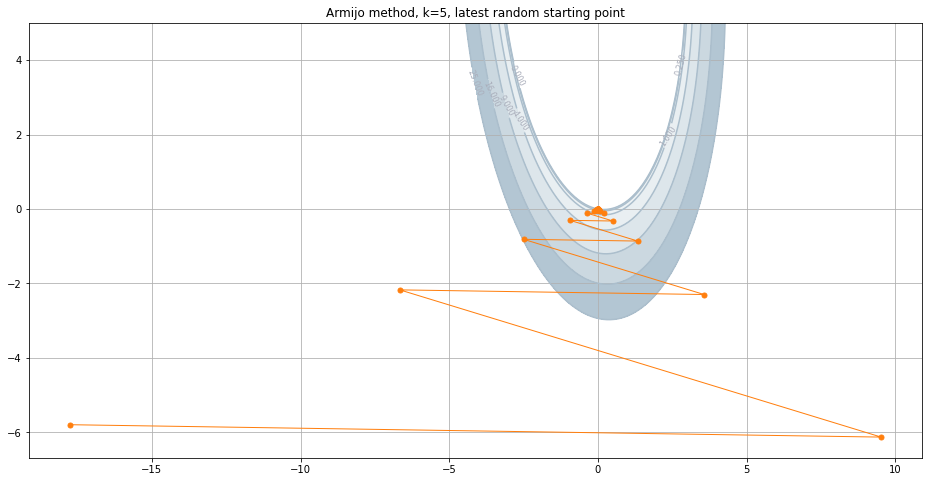

In [16]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

Number of iterations: 3


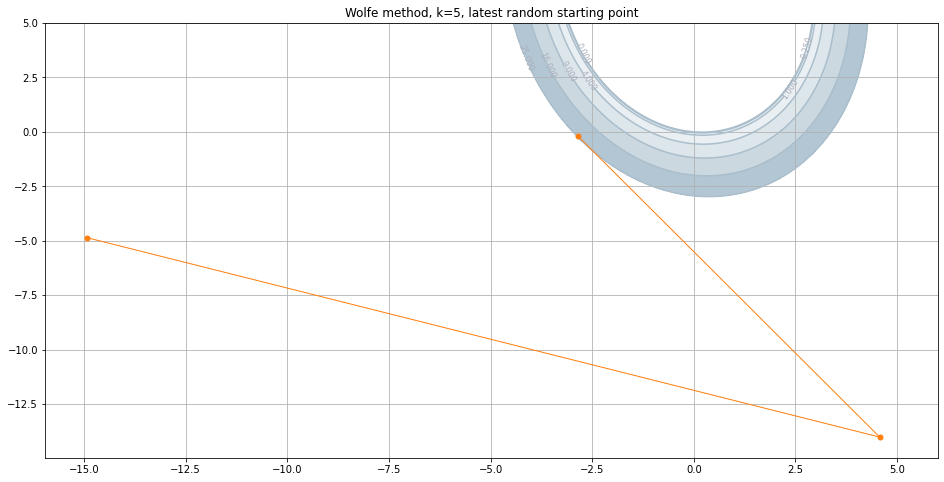

In [17]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])

### k = 10

In [78]:
k = 10
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


ValueError: not enough values to unpack (expected 2, got 0)

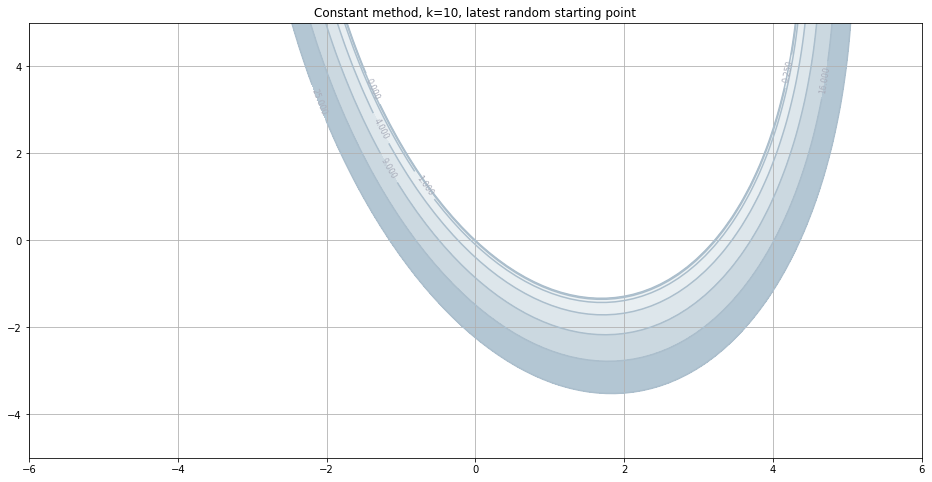

In [68]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 39


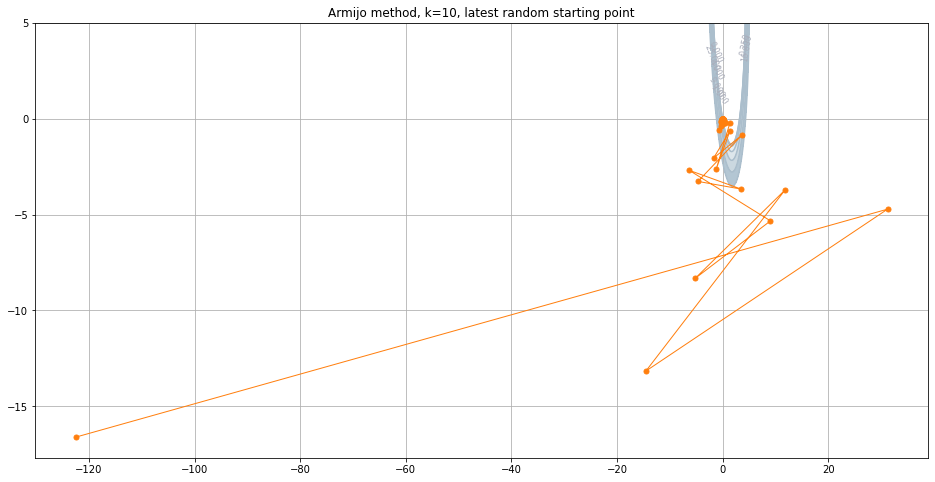

In [69]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 4


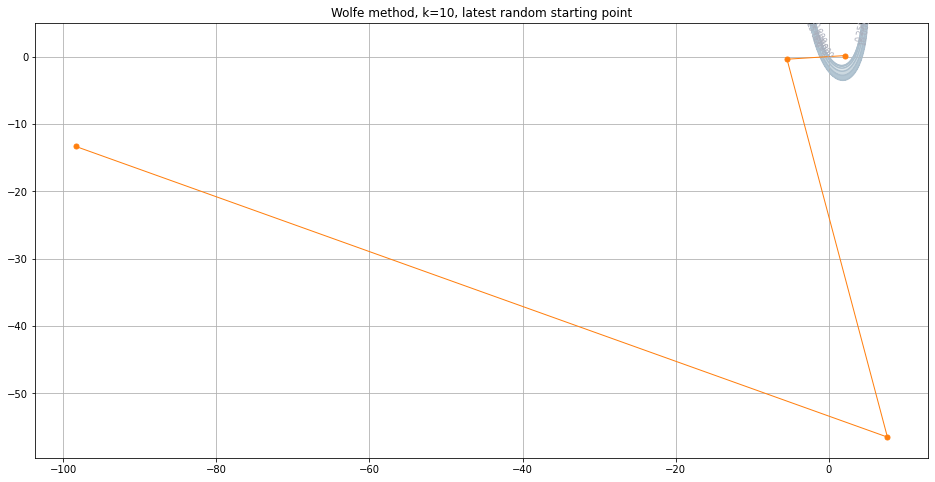

In [70]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

### k = 100

In [71]:
k = 100
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['x_coord'] = start_point[0]
    ful_res_dict[k][i]['y_coord'] = start_point[1]
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i][f'x_final_point_{method}'] = gd.hist['x_star'][0]
        ful_res_dict[k][i][f'y_final_point_{method}'] = gd.hist['x_star'][1]
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

ValueError: not enough values to unpack (expected 2, got 0)

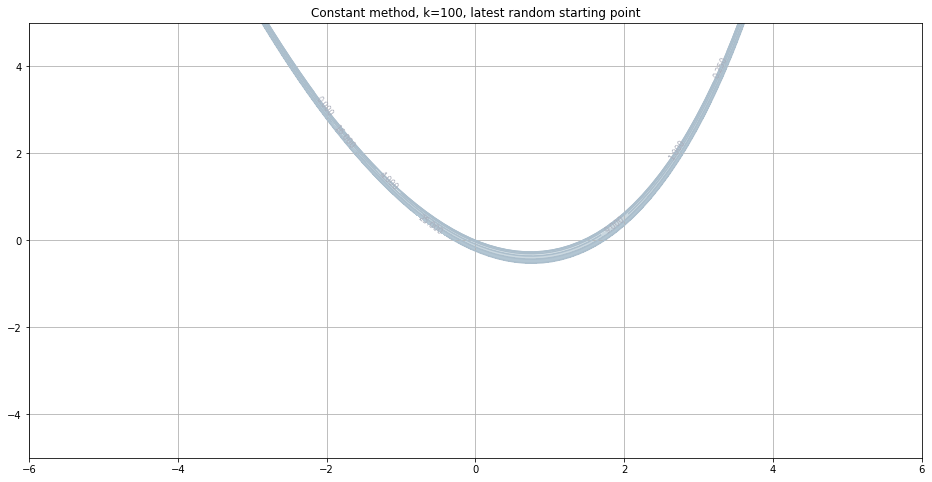

In [72]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 305


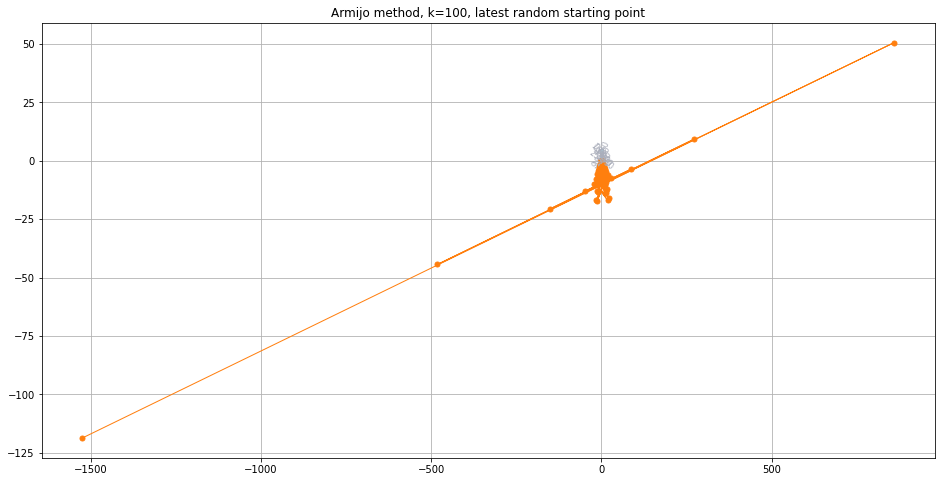

In [73]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 3


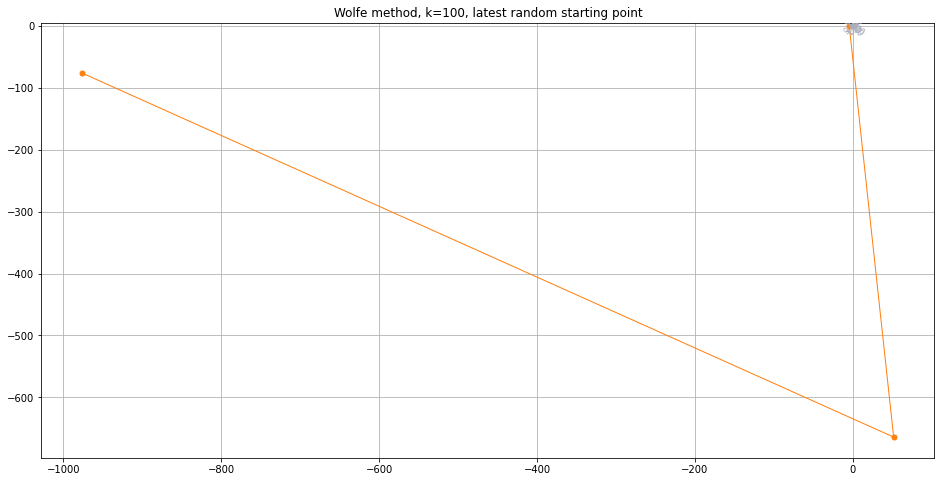

In [74]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

In [12]:
import pandas as pd

In [20]:
df = pd.DataFrame(ful_res_dict[5]).T

In [21]:
df

,x_coord,y_coord,Constant,x_final_point_Constant,y_final_point_Constant,Armijo,x_final_point_Armijo,y_final_point_Armijo,Wolfe,x_final_point_Wolfe,y_final_point_Wolfe
0,11.0,37.0,501.0,-5.682380e+302,-4.029651e+301,23.0,-0.191233,6.915977,3.0,-0.191133,6.915531
1,26.0,39.0,501.0,-1.213975e+303,-8.608882e+301,23.0,-0.191312,6.915986,3.0,-0.191133,6.915531
2,38.0,39.0,501.0,-1.725725e+303,-1.223795e+302,22.0,-0.191059,6.916445,3.0,-0.191133,6.915531
3,23.0,35.0,501.0,-1.073940e+303,-7.615829e+301,23.0,-0.191291,6.915929,3.0,-0.191133,6.915531
4,41.0,5.0,501.0,-1.750839e+303,-1.241605e+302,19.0,-0.191326,6.914719,3.0,-0.191133,6.915531
5,38.0,35.0,501.0,-1.713628e+303,-1.215217e+302,22.0,-0.191051,6.916322,3.0,-0.191133,6.915531
6,27.0,45.0,501.0,-1.274766e+303,-9.039982e+301,23.0,-0.191326,6.916077,3.0,-0.191133,6.915531
7,49.0,8.0,501.0,-2.101079e+303,-1.489977e+302,18.0,-0.190877,6.914756,3.0,-0.191133,6.915531
8,38.0,30.0,501.0,-1.698507e+303,-1.204494e+302,22.0,-0.191041,6.916168,3.0,-0.191133,6.915531
9,32.0,47.0,501.0,-1.494044e+303,-1.059499e+302,23.0,-0.191354,6.916100,3.0,-0.191133,6.915531


In [ ]:
Константу не выводим - уже по таблице понятно, что все плохо

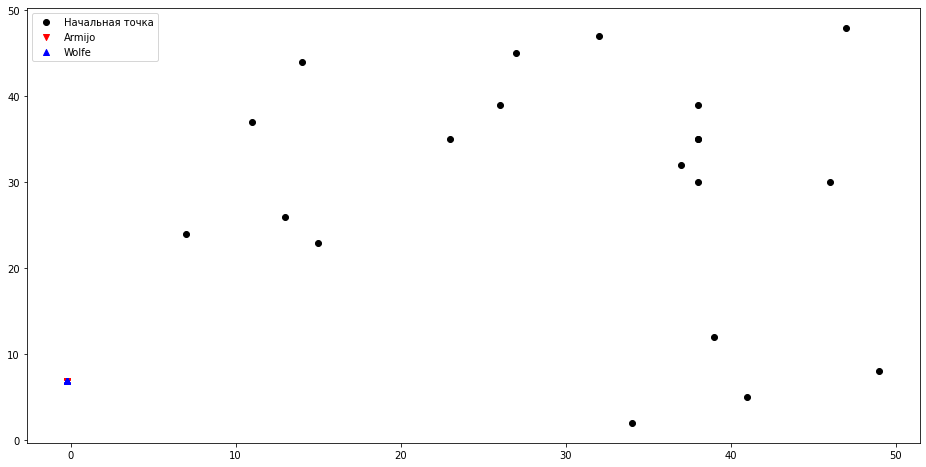

In [32]:
plt.scatter(df['x_coord'], df['y_coord'], c='black', label='Начальная точка')
plt.scatter(df['x_final_point_Armijo'], df['y_final_point_Armijo'], c='red',
            marker='v', label='Armijo')
plt.scatter(df['x_final_point_Wolfe'], df['y_final_point_Wolfe'], c='blue',
            marker='^', label='Wolfe')
plt.legend()

In [82]:
df = pd.DataFrame(ful_res_dict[10]).T

In [83]:
df.head()

,x_coord,y_coord,Armijo,x_final_point_Armijo,y_final_point_Armijo,Wolfe,x_final_point_Wolfe,y_final_point_Wolfe
0,85.0,69.0,36.0,-0.261757,13.560211,3.0,-0.262036,13.555929
1,52.0,49.0,38.0,-0.261899,13.558249,3.0,-0.262036,13.555929
2,60.0,5.0,33.0,-0.262056,13.552554,3.0,-0.262036,13.555929
3,82.0,24.0,29.0,-0.262693,13.559166,3.0,-0.262038,13.555929
4,96.0,60.0,37.0,-0.262671,13.559729,3.0,-0.262036,13.555929


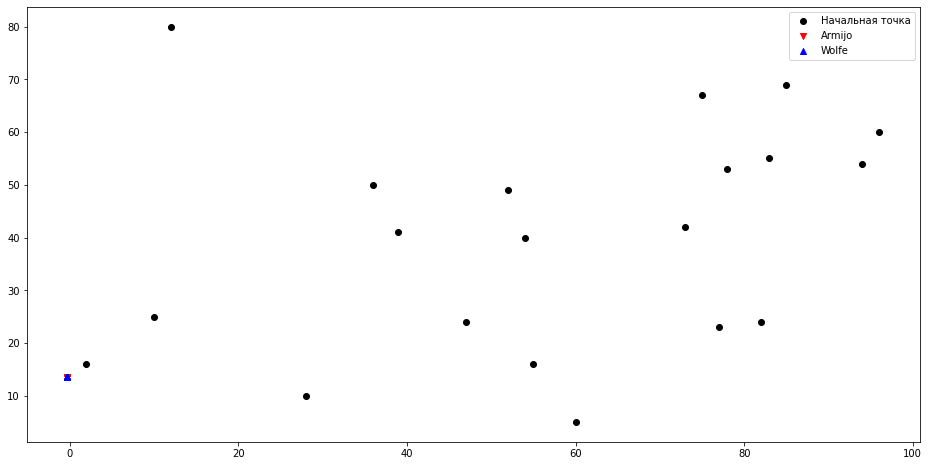

In [84]:
plt.scatter(df['x_coord'], df['y_coord'], c='black', label='Начальная точка')
plt.scatter(df['x_final_point_Armijo'], df['y_final_point_Armijo'], c='red',
            marker='v', label='Armijo')
plt.scatter(df['x_final_point_Wolfe'], df['y_final_point_Wolfe'], c='blue',
            marker='^', label='Wolfe')
plt.legend()

## Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

In [114]:
def get_random_matrix(n, k):
    diag = [1]
    for i in range(n - 2):
        diag.append(np.random.random() * (k - 1) + 1)
    diag.append(k)
    return np.diag(diag)


In [90]:
оставим толеранс как есть

SyntaxError: invalid syntax (<ipython-input-90-7c4802863164>, line 1)

In [123]:
n_list = [10, 100, 1000, 10000]
k_list = np.arange(5, 51, 5)
n_samples = 20

Calculating 10 dimensions with k: 5
Calculating 10 dimensions with k: 10
Calculating 10 dimensions with k: 15
Calculating 10 dimensions with k: 20
Calculating 10 dimensions with k: 25
Calculating 10 dimensions with k: 30
Calculating 10 dimensions with k: 35
Calculating 10 dimensions with k: 40
Calculating 10 dimensions with k: 45
Calculating 10 dimensions with k: 50
Calculating 100 dimensions with k: 5
Calculating 100 dimensions with k: 10
Calculating 100 dimensions with k: 15
Calculating 100 dimensions with k: 20
Calculating 100 dimensions with k: 25
Calculating 100 dimensions with k: 30
Calculating 100 dimensions with k: 35
Calculating 100 dimensions with k: 40
Calculating 100 dimensions with k: 45
Calculating 100 dimensions with k: 50
Calculating 1000 dimensions with k: 5
Calculating 1000 dimensions with k: 10
Calculating 1000 dimensions with k: 15
Calculating 1000 dimensions with k: 20
Calculating 1000 dimensions with k: 25
Calculating 1000 dimensions with k: 30
Calculating 1000 di

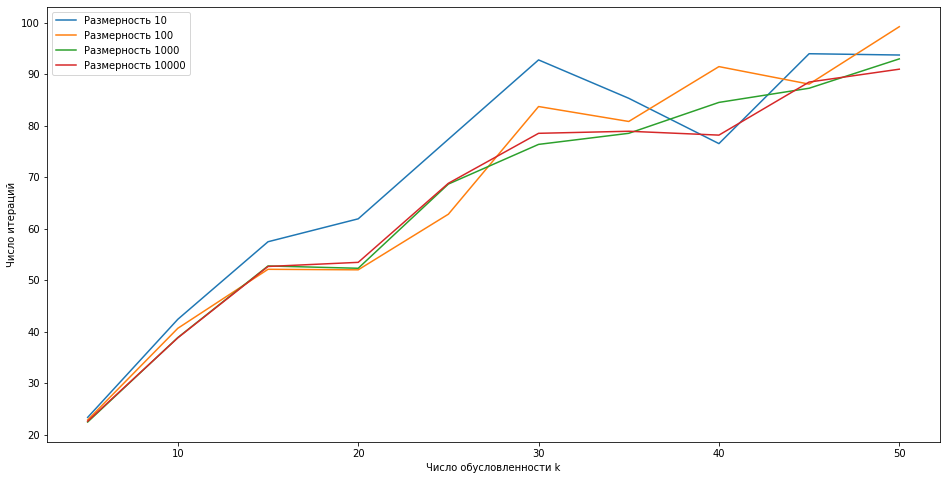

In [124]:
for n in n_list:
    iterations = []
    for k in k_list:
        print(f"Calculating {n} dimensions with k: {k}")
        curr_samples = []
        for sample in range(n_samples):
            curr_matrix = get_random_matrix(n, k)
            curr_b = np.random.random(n)
            starting_point = np.random.random(n)
            oracle = oracles.QuadraticOracle(curr_matrix, curr_b)
            gd = methods.GradientDescent(oracle, starting_point,
                                         line_search_options={'method': 'Wolfe'})
            gd.run()
            curr_samples.append(len(gd.hist["func"]))
        iterations.append(np.mean(curr_samples))
    plt.plot(k_list, iterations, label=f"Размерность {n}")
plt.xlabel("Число обусловленности k")
plt.ylabel("Число итераций")
plt.legend()


In [94]:
for i in n_list:
    print(i)

2
10
100
1000.0
10000
10
